# State of the art methods 

## Apply in DAX Stock Index Time Series

In [1]:
import numpy as np
import pandas as pd
from FTS import fts_util
from PyEMD import EMD
import seaborn as sns
import matplotlib.pyplot as plt
cores = sns.color_palette(n_colors=21)

In [2]:
ts = pd.read_csv('data/GDAXI.csv', index_col=[0])
ts.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-11-01,1421.229980,1496.050049,1359.180054,1441.199951,1441.199951,0
1990-12-01,1466.400024,1527.359985,1389.349976,1389.349976,1389.349976,0
1991-01-01,1359.430054,1421.160034,1317.170044,1421.160034,1421.160034,0
1991-02-01,1417.520020,1606.060059,1417.520020,1564.449951,1564.449951,0
1991-03-01,1521.300049,1604.670044,1499.260010,1515.319946,1515.319946,0


## Chen method 1996

In [3]:
col = 'Close'

In [4]:
Ul = 1000
Uu = 8000

In [5]:
D1 = min(ts[col].values) - Ul
D2 = Uu - max(ts[col].values)


print('MIn:{} Max:{}'.format(min(ts[col].values),max(ts[col].values)))
print('D1:{} and D2:{}'.format(D1,D2))
print('U = [{},{}]'.format(Ul,Uu))

MIn:1389.349976 Max:7644.549805
D1:389.34997599999997 and D2:355.45019500000035
U = [1000,8000]


No handles with labels found to put in legend.


Chen 1996 model
MAPE......: 12.32
------------------------------
MAE.......: 369.39
------------------------------
MSE.......: 191204.19
------------------------------
RMSE......: 437.27
------------------------------
DTW.......: 48887.292836999986


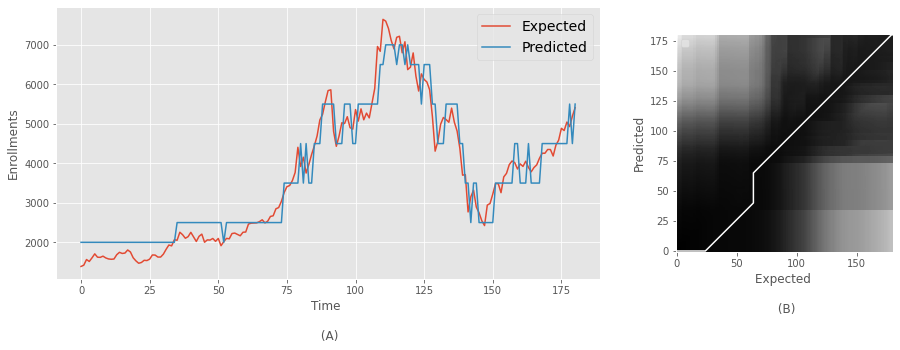


SUMMARY
------------------------------
Partition:181 size:182



In [6]:
from FTS.Models.Chen import Chen1996

model = Chen1996()
model.fit(ts[col].values, sets=7, d1=D1, d2=D2)
model.predict()
model.summary()

## Lee method 2009

No handles with labels found to put in legend.


MAPE......: 10.07
------------------------------
MAE.......: 325.3
------------------------------
MSE.......: 166947.87
------------------------------
RMSE......: 408.59
------------------------------
DTW.......: 45359.70051128261


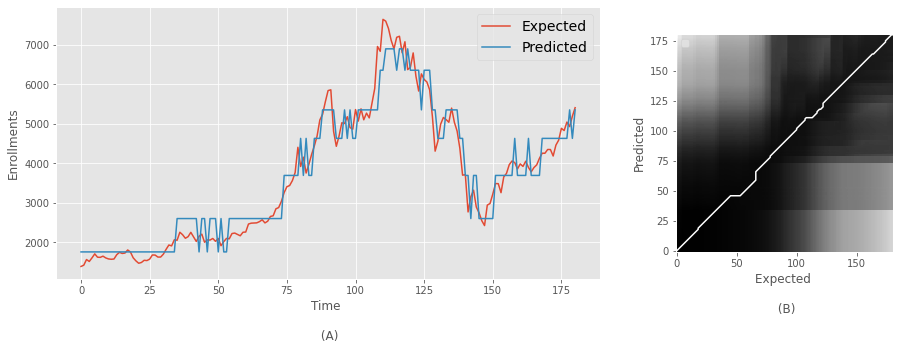

(10.07, 325.3, 166947.87, 408.59, 45359.70051128261)

In [7]:
from FTS.Models.Lee import Lee2009
model = Lee2009()
model.fit(ts[col].values, sets=7 ,d1=D2, d2=D2)
model.predict()

## Wang method 2013 + Chen method 1996

No handles with labels found to put in legend.


MAPE......: 10.87
------------------------------
MAE.......: 368.58
------------------------------
MSE.......: 219219.08
------------------------------
RMSE......: 468.21
------------------------------
DTW.......: 49237.81270249999


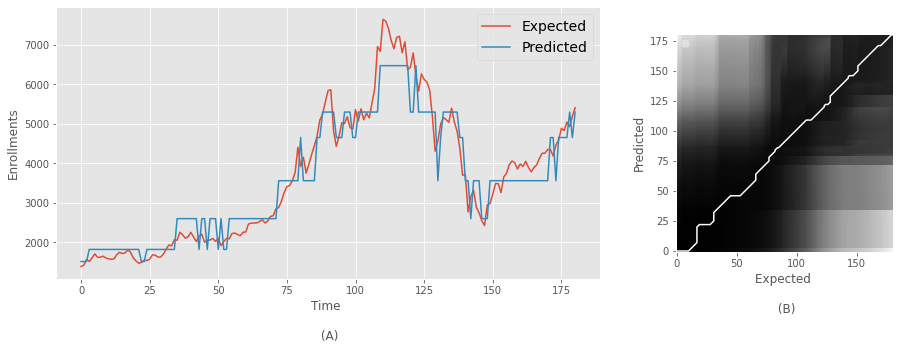

(10.87, 368.58, 219219.08, 468.21, 49237.81270249999)

In [8]:
from FTS.Models.Wang_Chen import Wang2013_Chen
model = Wang2013_Chen()
model.fit(ts[col].values, sets=7, d1=D1, d2=D2)
model.predict()

## Wang method 2013 + Lee method 2009

No handles with labels found to put in legend.


MAPE......: 10.23
------------------------------
MAE.......: 349.78
------------------------------
MSE.......: 192304.48
------------------------------
RMSE......: 438.53
------------------------------
DTW.......: 51171.30333900003


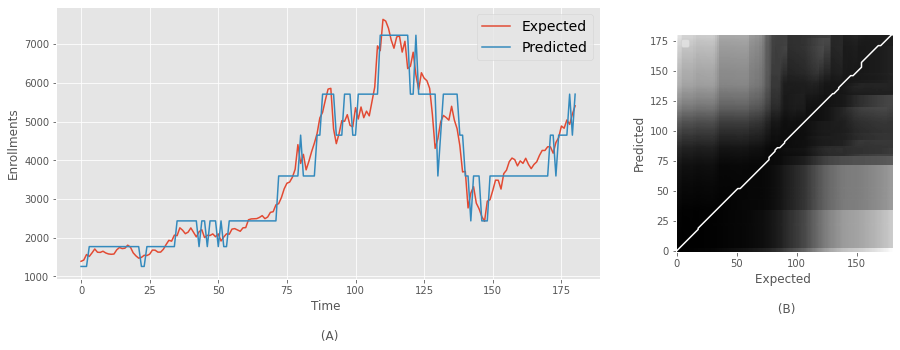

(10.23, 349.78, 192304.48, 438.53, 51171.30333900003)

In [9]:
from FTS.Models.Wang_Lee import Wang2013_Lee
model = Wang2013_Lee()
model.fit(ts[col].values, sets=7, d1=D1, d2=D2)
model.predict()

## Proposed Method + Chen method 1996

In [11]:
# apply EMD to get IMFs
emd = EMD()
imfs = emd.emd(ts[col].values)

df_fts = pd.DataFrame(ts[col].copy())
df_fts[col] = ts.values

col_imf = '2+3+residue'
df_fts[col_imf] = imfs[2]+imfs[3]+imfs[4]

/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
No handles with labels found to put in legend.


MAPE......: 11.61
------------------------------
MAE.......: 333.44
------------------------------
MSE.......: 177745.23
------------------------------
RMSE......: 421.6
------------------------------
DTW.......: 47394.09808785573


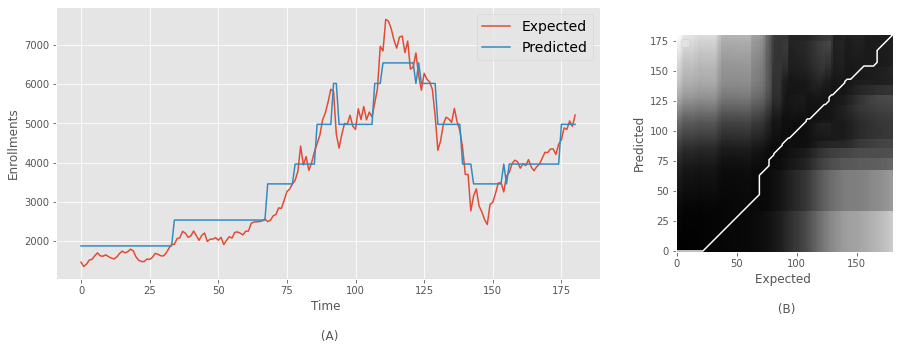

(11.61, 333.44, 177745.23, 421.6, 47394.09808785573)

In [14]:
from FTS.Models.MV_Chen import STFMV_Convencional_Chen
model = STFMV_Convencional_Chen()
model.fit(X=df_fts[[col, col_imf]].values, k=7)
model.predict()

## Proposed Method + Lee method 2009

/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/usr/local/lib/python3.9/dist-packages/fcmeans/fcm.py:49: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
No handles with labels found to put in legend.


MAPE......: 6.76
------------------------------
MAE.......: 233.28
------------------------------
MSE.......: 107032.85
------------------------------
RMSE......: 327.16
------------------------------
DTW.......: 36280.889464509404


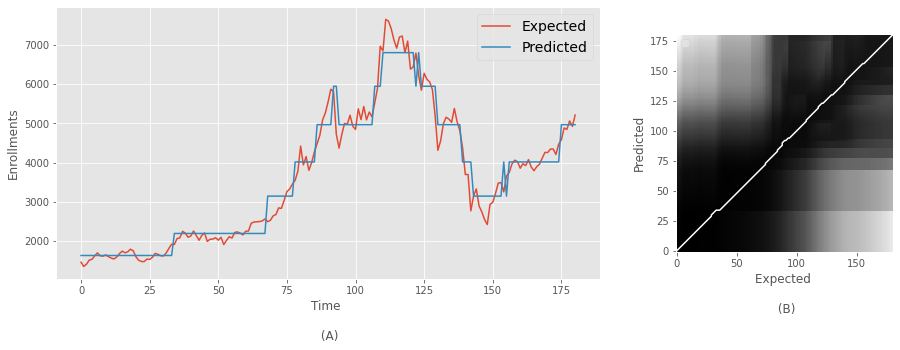

(6.76, 233.28, 107032.85, 327.16, 36280.889464509404)

In [16]:
from FTS.Models.MV_Lee import STFMV_Convencional_Lee
model = STFMV_Convencional_Lee()
model.fit(X=df_fts[[col, col_imf]].values, k=7)
model.predict()